In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import contractions
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# 1) Data Cleaning & Organization

In [2]:
tweets = pd.read_csv('covidvaccine.csv')

In [3]:
tweets.shape

(38459, 13)

In [4]:
# Checks out what type of data we're working with.

tweets.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [5]:
# Checks out what columns have null values.

for col in tweets.columns:
    print(col, tweets[col].isnull().sum())

user_name 0
user_location 8443
user_description 2373
user_created 0
user_followers 0
user_friends 0
user_favourites 0
user_verified 0
date 0
text 0
hashtags 11621
source 1
is_retweet 0


In [6]:
# Filters data, so the results have are on topic to what this analysis is looking for.

search_Keywords = ['vaccine','vaccines', 'covid-19', 'covid', 'cure','cures', 'corona','virus' 'coronavirus', '#covidvaccine','#coronavaccine'
                  '#coronavirusvaccine','#covid-19','#vaccine','#covid19vaccine']

filter_tweets_by_keywords = tweets['text'].apply(lambda x: len(set(search_Keywords) - set(x.lower().split()))) < len(search_Keywords)
tweets_filtered = tweets[filter_tweets_by_keywords].reset_index()

In [7]:
# Deletes an unnecessary column for our analysis.

del tweets_filtered['is_retweet']

In [8]:
# Remove any contractions within the 'text' column.
# Then we recombine the elements within the 'no_contractions' column into a string.

tweets_filtered['no_contractions'] = tweets_filtered['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
tweets_filtered['text_str'] = [' '.join(map(str, l)) for l in tweets_filtered['no_contractions']]
tweets_filtered.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,no_contractions,text_str
0,0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11,110,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,"[Australia, to, Manufacture, Covid-19, Vaccine...",Australia to Manufacture Covid-19 Vaccine and ...
1,1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17,0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,"[#CoronavirusVaccine, #CoronaVaccine, #CovidVa...",#CoronavirusVaccine #CoronaVaccine #CovidVacci...
2,2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143,566,8,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,"[Deaths, due, to, COVID-19, in, Affected, Coun...",Deaths due to COVID-19 in Affected Countries R...
3,7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321,3236,264351,False,18-08-2020 12:30,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],Twitter for iPhone,"[@MSNBC, Well,, let us, qualify, that:, would,...","@MSNBC Well, let us qualify that: would anyone..."
4,9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282,96,788,False,18-08-2020 11:57,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,"[#DNA, zooms, up, charts, in, 1st, week;, hear...",#DNA zooms up charts in 1st week; hear #vaccin...


In [9]:
# Tokenize the words in each of the tweets & lowercase all its elements.

tweets_filtered['tokenized'] = tweets_filtered['text_str'].apply(word_tokenize)
tweets_filtered['low_tokenized'] = tweets_filtered.text.str.lower()
tweets_filtered.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,no_contractions,text_str,tokenized,low_tokenized
0,0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11,110,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,"[Australia, to, Manufacture, Covid-19, Vaccine...",Australia to Manufacture Covid-19 Vaccine and ...,"[Australia, to, Manufacture, Covid-19, Vaccine...",australia to manufacture covid-19 vaccine and ...
1,1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17,0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,"[#CoronavirusVaccine, #CoronaVaccine, #CovidVa...",#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"[#, CoronavirusVaccine, #, CoronaVaccine, #, C...",#coronavirusvaccine #coronavaccine #covidvacci...
2,2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143,566,8,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,"[Deaths, due, to, COVID-19, in, Affected, Coun...",Deaths due to COVID-19 in Affected Countries R...,"[Deaths, due, to, COVID-19, in, Affected, Coun...",deaths due to covid-19 in affected countries\n...
3,7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321,3236,264351,False,18-08-2020 12:30,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],Twitter for iPhone,"[@MSNBC, Well,, let us, qualify, that:, would,...","@MSNBC Well, let us qualify that: would anyone...","[@, MSNBC, Well, ,, let, us, qualify, that, :,...","@msnbc well, let’s qualify that: would anyone ..."
4,9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282,96,788,False,18-08-2020 11:57,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,"[#DNA, zooms, up, charts, in, 1st, week;, hear...",#DNA zooms up charts in 1st week; hear #vaccin...,"[#, DNA, zooms, up, charts, in, 1st, week, ;, ...",#dna zooms up charts in 1st week; hear #vacci...


In [10]:
# Here we'll remove the punctiation and special characters.

def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Removes @mentions
    text = re.sub(r'#', '', text)  # Removes hashtags
    text = re.sub(r'http[s]?://\S+', '', text)  # Removes website links
    text = re.sub(r'[^\w\s]+', '', text)  # Removes punctuation
    return text

tweets_filtered['clean_txt'] = tweets_filtered.low_tokenized.apply(clean_text)
tweets_filtered.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,no_contractions,text_str,tokenized,low_tokenized,clean_txt
0,0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11,110,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,"[Australia, to, Manufacture, Covid-19, Vaccine...",Australia to Manufacture Covid-19 Vaccine and ...,"[Australia, to, Manufacture, Covid-19, Vaccine...",australia to manufacture covid-19 vaccine and ...,australia to manufacture covid19 vaccine and g...
1,1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17,0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,"[#CoronavirusVaccine, #CoronaVaccine, #CovidVa...",#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"[#, CoronavirusVaccine, #, CoronaVaccine, #, C...",#coronavirusvaccine #coronavaccine #covidvacci...,coronavirusvaccine coronavaccine covidvaccine ...
2,2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143,566,8,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,"[Deaths, due, to, COVID-19, in, Affected, Coun...",Deaths due to COVID-19 in Affected Countries R...,"[Deaths, due, to, COVID-19, in, Affected, Coun...",deaths due to covid-19 in affected countries\n...,deaths due to covid19 in affected countries\nr...
3,7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321,3236,264351,False,18-08-2020 12:30,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],Twitter for iPhone,"[@MSNBC, Well,, let us, qualify, that:, would,...","@MSNBC Well, let us qualify that: would anyone...","[@, MSNBC, Well, ,, let, us, qualify, that, :,...","@msnbc well, let’s qualify that: would anyone ...",well lets qualify that would anyone of any pa...
4,9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282,96,788,False,18-08-2020 11:57,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,"[#DNA, zooms, up, charts, in, 1st, week;, hear...",#DNA zooms up charts in 1st week; hear #vaccin...,"[#, DNA, zooms, up, charts, in, 1st, week, ;, ...",#dna zooms up charts in 1st week; hear #vacci...,dna zooms up charts in 1st week hear vaccines...


In [11]:
# Removes any stopwords from out data.

stop_words = set(stopwords.words('english'))
tweets_filtered['stopwords_rem'] = tweets_filtered['clean_txt'].apply(lambda x: [word for word in x.split() if word not in stop_words])
tweets_filtered.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,no_contractions,text_str,tokenized,low_tokenized,clean_txt,stopwords_rem
0,0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11,110,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,"[Australia, to, Manufacture, Covid-19, Vaccine...",Australia to Manufacture Covid-19 Vaccine and ...,"[Australia, to, Manufacture, Covid-19, Vaccine...",australia to manufacture covid-19 vaccine and ...,australia to manufacture covid19 vaccine and g...,"[australia, manufacture, covid19, vaccine, giv..."
1,1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17,0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,"[#CoronavirusVaccine, #CoronaVaccine, #CovidVa...",#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"[#, CoronavirusVaccine, #, CoronaVaccine, #, C...",#coronavirusvaccine #coronavaccine #covidvacci...,coronavirusvaccine coronavaccine covidvaccine ...,"[coronavirusvaccine, coronavaccine, covidvacci..."
2,2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143,566,8,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,"[Deaths, due, to, COVID-19, in, Affected, Coun...",Deaths due to COVID-19 in Affected Countries R...,"[Deaths, due, to, COVID-19, in, Affected, Coun...",deaths due to covid-19 in affected countries\n...,deaths due to covid19 in affected countries\nr...,"[deaths, due, covid19, affected, countries, re..."
3,7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321,3236,264351,False,18-08-2020 12:30,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],Twitter for iPhone,"[@MSNBC, Well,, let us, qualify, that:, would,...","@MSNBC Well, let us qualify that: would anyone...","[@, MSNBC, Well, ,, let, us, qualify, that, :,...","@msnbc well, let’s qualify that: would anyone ...",well lets qualify that would anyone of any pa...,"[well, lets, qualify, would, anyone, party, ge..."
4,9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282,96,788,False,18-08-2020 11:57,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,"[#DNA, zooms, up, charts, in, 1st, week;, hear...",#DNA zooms up charts in 1st week; hear #vaccin...,"[#, DNA, zooms, up, charts, in, 1st, week, ;, ...",#dna zooms up charts in 1st week; hear #vacci...,dna zooms up charts in 1st week hear vaccines...,"[dna, zooms, charts, 1st, week, hear, vaccines..."


In [12]:
# Identifies each word's part of speech.

tweets_filtered['pos_tags'] = tweets_filtered['stopwords_rem'].apply(nltk.tag.pos_tag)
tweets_filtered.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,no_contractions,text_str,tokenized,low_tokenized,clean_txt,stopwords_rem,pos_tags
0,0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11,110,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,"[Australia, to, Manufacture, Covid-19, Vaccine...",Australia to Manufacture Covid-19 Vaccine and ...,"[Australia, to, Manufacture, Covid-19, Vaccine...",australia to manufacture covid-19 vaccine and ...,australia to manufacture covid19 vaccine and g...,"[australia, manufacture, covid19, vaccine, giv...","[(australia, JJ), (manufacture, NN), (covid19,..."
1,1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17,0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,"[#CoronavirusVaccine, #CoronaVaccine, #CovidVa...",#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"[#, CoronavirusVaccine, #, CoronaVaccine, #, C...",#coronavirusvaccine #coronavaccine #covidvacci...,coronavirusvaccine coronavaccine covidvaccine ...,"[coronavirusvaccine, coronavaccine, covidvacci...","[(coronavirusvaccine, NN), (coronavaccine, NN)..."
2,2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143,566,8,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,"[Deaths, due, to, COVID-19, in, Affected, Coun...",Deaths due to COVID-19 in Affected Countries R...,"[Deaths, due, to, COVID-19, in, Affected, Coun...",deaths due to covid-19 in affected countries\n...,deaths due to covid19 in affected countries\nr...,"[deaths, due, covid19, affected, countries, re...","[(deaths, NNS), (due, JJ), (covid19, RB), (aff..."
3,7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321,3236,264351,False,18-08-2020 12:30,"@MSNBC Well, let’s qualify that: would anyone ...",['CovidVaccine'],Twitter for iPhone,"[@MSNBC, Well,, let us, qualify, that:, would,...","@MSNBC Well, let us qualify that: would anyone...","[@, MSNBC, Well, ,, let, us, qualify, that, :,...","@msnbc well, let’s qualify that: would anyone ...",well lets qualify that would anyone of any pa...,"[well, lets, qualify, would, anyone, party, ge...","[(well, RB), (lets, VBZ), (qualify, VB), (woul..."
4,9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282,96,788,False,18-08-2020 11:57,#DNA zooms up charts in 1st week; hear #vacci...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,"[#DNA, zooms, up, charts, in, 1st, week;, hear...",#DNA zooms up charts in 1st week; hear #vaccin...,"[#, DNA, zooms, up, charts, in, 1st, week, ;, ...",#dna zooms up charts in 1st week; hear #vacci...,dna zooms up charts in 1st week hear vaccines...,"[dna, zooms, charts, 1st, week, hear, vaccines...","[(dna, NN), (zooms, NNS), (charts, NNS), (1st,..."


In [13]:
# This will concise the part of speech tags from above.

def wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
tweets_filtered['wordnet_pos'] = tweets_filtered['pos_tags'].apply(lambda x: [(word, wordnet_pos(pos_tag)) for (word, pos_tag) in x])
tweets_filtered.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,hashtags,source,no_contractions,text_str,tokenized,low_tokenized,clean_txt,stopwords_rem,pos_tags,wordnet_pos
0,0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11,110,False,18-08-2020 12:55,...,['CovidVaccine'],Twitter Web App,"[Australia, to, Manufacture, Covid-19, Vaccine...",Australia to Manufacture Covid-19 Vaccine and ...,"[Australia, to, Manufacture, Covid-19, Vaccine...",australia to manufacture covid-19 vaccine and ...,australia to manufacture covid19 vaccine and g...,"[australia, manufacture, covid19, vaccine, giv...","[(australia, JJ), (manufacture, NN), (covid19,...","[(australia, a), (manufacture, n), (covid19, n..."
1,1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17,0,False,18-08-2020 12:55,...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,"[#CoronavirusVaccine, #CoronaVaccine, #CovidVa...",#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"[#, CoronavirusVaccine, #, CoronaVaccine, #, C...",#coronavirusvaccine #coronavaccine #covidvacci...,coronavirusvaccine coronavaccine covidvaccine ...,"[coronavirusvaccine, coronavaccine, covidvacci...","[(coronavirusvaccine, NN), (coronavaccine, NN)...","[(coronavirusvaccine, n), (coronavaccine, n), ..."
2,2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143,566,8,False,18-08-2020 12:46,...,NaN,Twitter Web App,"[Deaths, due, to, COVID-19, in, Affected, Coun...",Deaths due to COVID-19 in Affected Countries R...,"[Deaths, due, to, COVID-19, in, Affected, Coun...",deaths due to covid-19 in affected countries\n...,deaths due to covid19 in affected countries\nr...,"[deaths, due, covid19, affected, countries, re...","[(deaths, NNS), (due, JJ), (covid19, RB), (aff...","[(deaths, n), (due, a), (covid19, r), (affecte..."
3,7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321,3236,264351,False,18-08-2020 12:30,...,['CovidVaccine'],Twitter for iPhone,"[@MSNBC, Well,, let us, qualify, that:, would,...","@MSNBC Well, let us qualify that: would anyone...","[@, MSNBC, Well, ,, let, us, qualify, that, :,...","@msnbc well, let’s qualify that: would anyone ...",well lets qualify that would anyone of any pa...,"[well, lets, qualify, would, anyone, party, ge...","[(well, RB), (lets, VBZ), (qualify, VB), (woul...","[(well, r), (lets, v), (qualify, v), (would, n..."
4,9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282,96,788,False,18-08-2020 11:57,...,"['DNA', 'vaccines', 'pandemic', 'COVID19', 'Co...",Twitter Web App,"[#DNA, zooms, up, charts, in, 1st, week;, hear...",#DNA zooms up charts in 1st week; hear #vaccin...,"[#, DNA, zooms, up, charts, in, 1st, week, ;, ...",#dna zooms up charts in 1st week; hear #vacci...,dna zooms up charts in 1st week hear vaccines...,"[dna, zooms, charts, 1st, week, hear, vaccines...","[(dna, NN), (zooms, NNS), (charts, NNS), (1st,...","[(dna, n), (zooms, n), (charts, n), (1st, n), ..."


In [14]:
# Converts words into their root form. 

word_Lemm = WordNetLemmatizer()
tweets_filtered['lemmatized'] = tweets_filtered['wordnet_pos'].apply(lambda x: [word_Lemm.lemmatize(word, tag) for word, tag in x])
tweets_filtered.head()

,index,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,source,no_contractions,text_str,tokenized,low_tokenized,clean_txt,stopwords_rem,pos_tags,wordnet_pos,lemmatized
0,0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64,11,110,False,18-08-2020 12:55,...,Twitter Web App,"[Australia, to, Manufacture, Covid-19, Vaccine...",Australia to Manufacture Covid-19 Vaccine and ...,"[Australia, to, Manufacture, Covid-19, Vaccine...",australia to manufacture covid-19 vaccine and ...,australia to manufacture covid19 vaccine and g...,"[australia, manufacture, covid19, vaccine, giv...","[(australia, JJ), (manufacture, NN), (covid19,...","[(australia, a), (manufacture, n), (covid19, n...","[australia, manufacture, covid19, vaccine, giv..."
1,1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1,17,0,False,18-08-2020 12:55,...,Twitter for Android,"[#CoronavirusVaccine, #CoronaVaccine, #CovidVa...",#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"[#, CoronavirusVaccine, #, CoronaVaccine, #, C...",#coronavirusvaccine #coronavaccine #covidvacci...,coronavirusvaccine coronavaccine covidvaccine ...,"[coronavirusvaccine, coronavaccine, covidvacci...","[(coronavirusvaccine, NN), (coronavaccine, NN)...","[(coronavirusvaccine, n), (coronavaccine, n), ...","[coronavirusvaccine, coronavaccine, covidvacci..."
2,2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143,566,8,False,18-08-2020 12:46,...,Twitter Web App,"[Deaths, due, to, COVID-19, in, Affected, Coun...",Deaths due to COVID-19 in Affected Countries R...,"[Deaths, due, to, COVID-19, in, Affected, Coun...",deaths due to covid-19 in affected countries\n...,deaths due to covid19 in affected countries\nr...,"[deaths, due, covid19, affected, countries, re...","[(deaths, NNS), (due, JJ), (covid19, RB), (aff...","[(deaths, n), (due, a), (covid19, r), (affecte...","[death, due, covid19, affected, country, read,..."
3,7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321,3236,264351,False,18-08-2020 12:30,...,Twitter for iPhone,"[@MSNBC, Well,, let us, qualify, that:, would,...","@MSNBC Well, let us qualify that: would anyone...","[@, MSNBC, Well, ,, let, us, qualify, that, :,...","@msnbc well, let’s qualify that: would anyone ...",well lets qualify that would anyone of any pa...,"[well, lets, qualify, would, anyone, party, ge...","[(well, RB), (lets, VBZ), (qualify, VB), (woul...","[(well, r), (lets, v), (qualify, v), (would, n...","[well, let, qualify, would, anyone, party, get..."
4,9,VUMC OAP,"Nashville, TN","Office of Advanced Practice, Vanderbilt Univer...",16-03-2017 20:22,282,96,788,False,18-08-2020 11:57,...,Twitter Web App,"[#DNA, zooms, up, charts, in, 1st, week;, hear...",#DNA zooms up charts in 1st week; hear #vaccin...,"[#, DNA, zooms, up, charts, in, 1st, week, ;, ...",#dna zooms up charts in 1st week; hear #vacci...,dna zooms up charts in 1st week hear vaccines...,"[dna, zooms, charts, 1st, week, hear, vaccines...","[(dna, NN), (zooms, NNS), (charts, NNS), (1st,...","[(dna, n), (zooms, n), (charts, n), (1st, n), ...","[dna, zoom, chart, 1st, week, hear, vaccine, e..."


# 2) Exploratory Data & Sentiment Analysis

In [15]:
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from wordcloud import WordCloud
from PIL import Image
import datetime as dt
import seaborn as sns
from matplotlib.pyplot import figure
import time

In [16]:
# Make a new Dataframe wit the 'lemmatized' column from tweets_filtered
# Convert the enire column from a list to string
# Drop duplicates

df = pd.DataFrame(tweets_filtered[['date', 'clean_txt', 'lemmatized']])
df['lemmatized'] = [' '.join(map(str, l)) for l in df['lemmatized']]
df.drop_duplicates(inplace = True)
df['date'] = pd.to_datetime(df['date'])

In [17]:
# Transform column from string to a list

df['clean_txt'] = df['clean_txt'].str.split()

In [18]:
# Create a new column with the word count of each tweet

df['word_count'] = df.clean_txt.apply(lambda x: len(x))

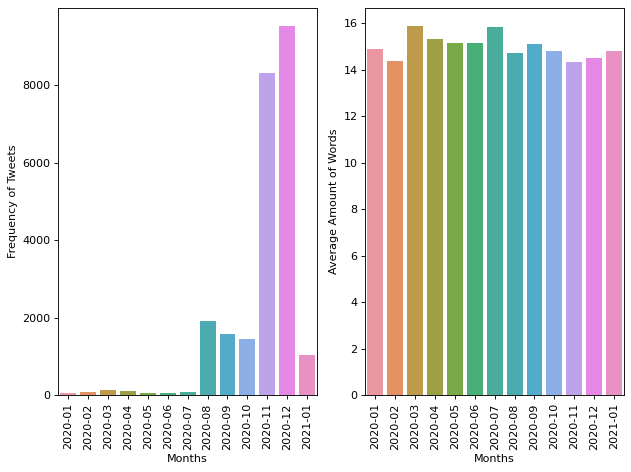

In [19]:
# Lets check out the frequency of the tweets per month as well as average amount of words of tweets per month

count_plt = df.groupby(pd.Grouper(key= 'date', freq = '1M')).count()
mean_plt = df.groupby(pd.Grouper(key= 'date', freq = '1M')).mean()
x_ticks = pd.to_datetime(pd.date_range(start='1/1/2020', periods = 13, freq='1M')).strftime('%Y-%m')

_ = figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
_ = plt.subplot(1,2,1)
_ = plt.xlabel('Months')
_ = plt.xticks(rotation = 90)
_ = plt.ylabel('Frequency of Tweets')
_ = sns.barplot(x = x_ticks, y = count_plt.word_count.values)

_ = plt.subplot(1,2,2)
_ = plt.ylabel('Average Amount of Words')
_ = plt.xlabel('Months')
_ = plt.xticks(rotation = 90)
_ = sns.barplot(x = x_ticks, y = mean_plt.word_count.values)
_ = plt.tight_layout()

The graphs above depict the frequency of tweets and average amounts of words within a tweet per month. Notice that as November and December roll in, the amount of tweets in relation to covid vaccines increase drastically. This is most likely due to the news on vaccine trials becoming more apparent in media as the devolpment of the vaccines are getting closer to their final stage. 

** Limitations: The data we have collected extends into January 1st, 2021 (as it was the time I began this project). Hence, their could be new information that will otherwise invalidate the statement above.

In [20]:
# Calculates negative, positive, neutral & compound values

df[['polarity', 'subjectivity']] = df['lemmatized'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

for index, row in df['lemmatized'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row) #provides score values for the variables directly below
    neg = score['neg']  
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df.loc[index, 'sentiment'] = 'negative' #Assigns overall sentiment of post based on polarity score
    elif pos > neg:
        df.loc[index, 'sentiment'] = 'positive'
    else:
        df.loc[index, 'sentiment'] = 'neutral'
    df.loc[index, 'neg'] = neg
    df.loc[index, 'neu'] = neu
    df.loc[index, 'pos'] = pos
    df.loc[index, 'compound'] = comp


In [21]:
pd.set_option('display.max_colwidth', None)
df.sample(5)

,date,clean_txt,lemmatized,word_count,polarity,subjectivity,sentiment,neg,neu,pos,compound
11343,2020-11-20 12:39:22,"[cant, stop, laughing, talking, about, their, new, covidvaccine, she, forgets, she, wants, independ]",cant stop laugh talk new covidvaccine forget want independ,13,0.218182,0.277273,negative,0.371,0.384,0.245,-0.3891
3278,2020-09-09 04:53:00,"[who, says, working, with, china, on, requirements, for, covidvaccine, approval, via]",say work china requirement covidvaccine approval via,11,0.000000,0.000000,positive,0.000,0.659,0.341,0.4767
2223,2020-08-19 22:16:00,"[russian, pigeon, after, the, vaccination, covid_19, covidvac, covidvaccine, hilarious]",russian pigeon vaccination covid_19 covidvac covidvaccine hilarious,9,0.250000,0.500000,positive,0.000,0.690,0.310,0.4019
8428,2020-11-09 15:49:04,"[covid, vaccine, first, milestone, vaccine, offers, 90, protection, bbcnews, covidvaccine, covid19]",covid vaccine first milestone vaccine offer 90 protection bbcnews covidvaccine covid19,11,0.250000,0.333333,neutral,0.000,1.000,0.000,0.0000
12367,2020-11-18 13:46:25,"[amp, biontech, claim, their, vaccine, could, be, sent, to, _fda, for, approval, within, days, what, are, your, thought]",amp biontech claim vaccine could send _fda approval within day think,18,0.000000,0.000000,positive,0.000,0.763,0.237,0.4767


In [22]:
# Split data into 3 groups:

df_pos = df[df['sentiment'] == 'positive']
df_neg = df[df['sentiment'] == 'negative']
df_neu = df[df['sentiment'] == 'neutral']
df_pos.head()

,date,clean_txt,lemmatized,word_count,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,2020-08-18 12:55:00,"[australia, to, manufacture, covid19, vaccine, and, give, it, to, the, citizens, for, free, of, cost, afp, quotes, prime, minister, covidvaccine]",australia manufacture covid19 vaccine give citizen free cost afp quote prime minister covidvaccine,20,0.4,0.80,positive,0.0,0.784,0.216,0.5106
1,2020-08-18 12:55:00,"[coronavirusvaccine, coronavaccine, covidvaccine, australia, is, doing, very, good]",coronavirusvaccine coronavaccine covidvaccine australia good,8,0.7,0.60,positive,0.0,0.580,0.420,0.4404
3,2020-08-18 12:30:00,"[well, lets, qualify, that, would, anyone, of, any, party, get, a, vaccine, rushed, out, and, minimally, tested, coming, from, russia, covidvaccine]",well let qualify would anyone party get vaccine rush minimally test come russia covidvaccine,21,-0.1,0.60,positive,0.0,0.714,0.286,0.5859
6,2020-08-18 11:02:00,"[great, news, s, vaccine, has, entered, phase, 3, trial, read, more, pharmaceutical]",great news vaccine enter phase 3 trial read pharmaceutical,12,0.8,0.75,positive,0.0,0.631,0.369,0.6249
12,2020-08-18 08:52:00,"[search, chennai, corona, affected, street, or, area, wise, covidvaccine, covid19chennai, covid19]",search chennai corona affect street area wise covidvaccine covid19chennai covid19,11,0.7,0.90,positive,0.0,0.744,0.256,0.4767


In [23]:
# Creates a function that counts the total values in each group and provides the overall percentage of each group

def count_values_in_column(data, feature):
    total = data.loc[:, feature].value_counts(dropna= False)
    percentage = round(data.loc[:, feature].value_counts(dropna= False, normalize= True) * 100, 2)
    return pd.concat([total,percentage], axis= 1, keys= ['Total','Percentage'])

In [24]:
count_values_in_column(df, 'sentiment')

,Total,Percentage
positive,10574,43.22
neutral,9377,38.32
negative,4517,18.46


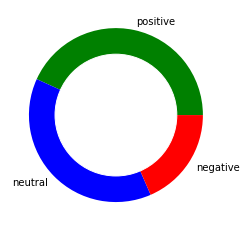

In [25]:
# Creates a pie chart for the percentage of each sentiment type

piechart = count_values_in_column(df , 'sentiment')
names = piechart.index
size = piechart['Percentage']
 
# Creates a circle for the center of the plot

my_circle=plt.Circle((0, 0), 0.7, color= 'white')
plt.pie(size, labels= names, colors= ['green', 'blue', 'red'])
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

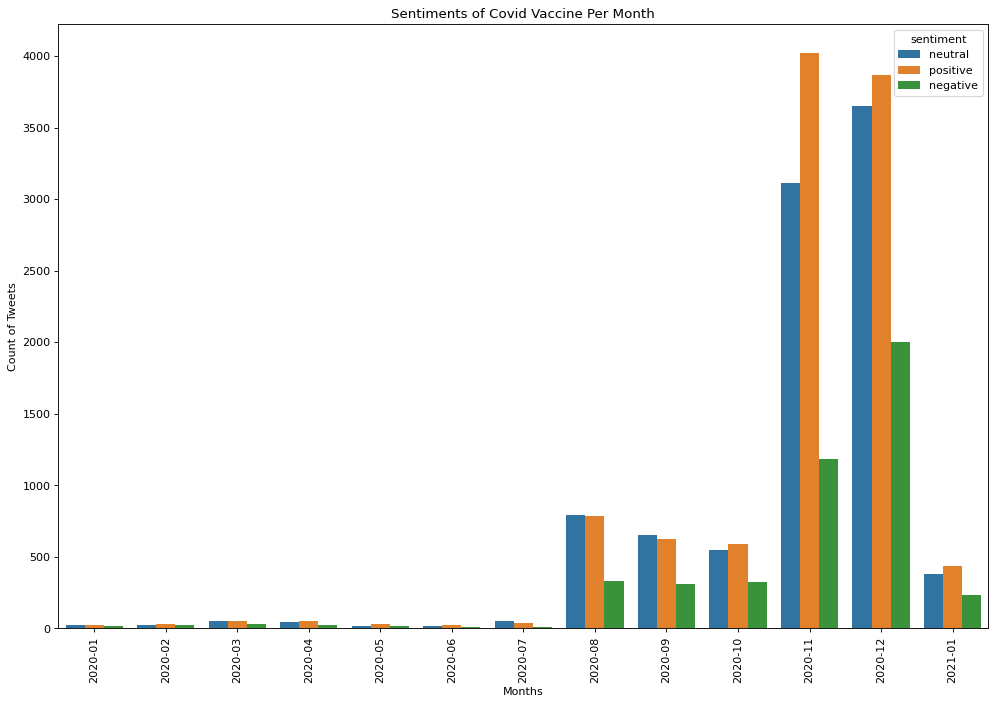

In [26]:
# Lets create a bar plot to distinguish the amount of tweets based on sentiments by month

sent_count = pd.DataFrame(df.groupby(pd.Grouper(key= 'date', freq = '1M'))['sentiment'].value_counts()).rename(columns =\
                                                                                                       {'sentiment': 'count'})
sent_count.reset_index(inplace= True)
sent_count.date = sent_count['date'].dt.to_period('M')

_ = figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
_ = sns.barplot(x= 'date' , y= 'count', hue= 'sentiment', data= sent_count)
_ = plt.xlabel('Months')
_ = plt.ylabel('Count of Tweets')
_ = plt.title('Sentiments of Covid Vaccine Per Month')
_ = plt.xticks(rotation = 90)
_ = plt.show()

It can be seen that the numbers of tweets regarding covid vaccines increased in the months of November and December. Additionally, the positive tweets have increased more so than the others. This is most likely due the holidays that fall within these months where typically families reunite with each other to celebrate, so the concerns on whether or not one has contracted the virus was more apparent to avoid risking their families members health. Further, this increases the support for the covid vaccine.

** Limitations: The data we have collected extends into January 1st, 2021 (as it was the time I began this project). Hence, their could be new information that will otherwise invalidate the statement above.

In [27]:
# Creates a function to construct the word cloud

def create_wordcloud(text):
    wc = WordCloud(background_color= 'white', max_words= 2500, repeat= True)
    wc.generate(str(text))
    wc.to_file('wc.png')
    print('Word Cloud Saved Successfully')
    path= 'wc.png'
    display(Image.open(path))

Word Cloud Saved Successfully


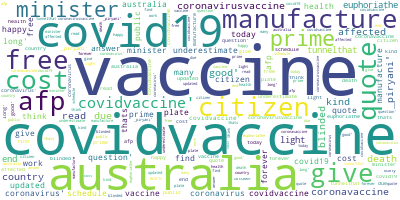

In [28]:
# Display wordcloud of the overall data

create_wordcloud(df['lemmatized'].values)

Word Cloud Saved Successfully


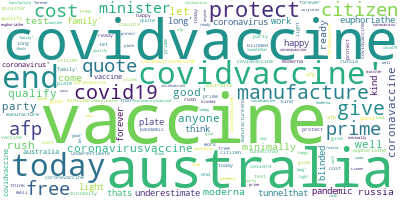

In [29]:
# Display wordcloud of the positive sentiments

create_wordcloud(df_pos['lemmatized'].values)

Word Cloud Saved Successfully


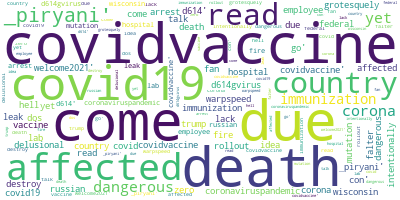

In [30]:
# Display wordcloud of the negative sentiments

create_wordcloud(df_neg['lemmatized'].values)

In [31]:
# Density of tweets

df['text_length'] = df['lemmatized'].apply(len)
df['filtered_word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(df.groupby('sentiment').text_length.mean()), 2)

,text_length
sentiment,
negative,70.93
neutral,66.62
positive,70.04


In [32]:
# Word count for each sentiment type

round(pd.DataFrame(df.groupby('sentiment').filtered_word_count.mean()), 2)

,filtered_word_count
sentiment,
negative,9.84
neutral,8.81
positive,9.65


In [33]:
# Apply CountVectorizer to convert each word into a feature

countVectorizer = CountVectorizer() 
countVector = countVectorizer.fit_transform(df['lemmatized'])

In [34]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())

In [35]:
# Finds the most frequently used word and rename columns

count = pd.DataFrame(count_vect_df.sum())
count_df = count.sort_values(by= 0, ascending= False)
count_df.reset_index(inplace= True)
count_df = count_df.rename(columns = {'index': 'word', 0 : 'frequency'})

In [36]:
count_df.head()

,word,frequency
0,covidvaccine,17671
1,vaccine,11260
2,covid19,6843
3,covid,3335
4,get,2957


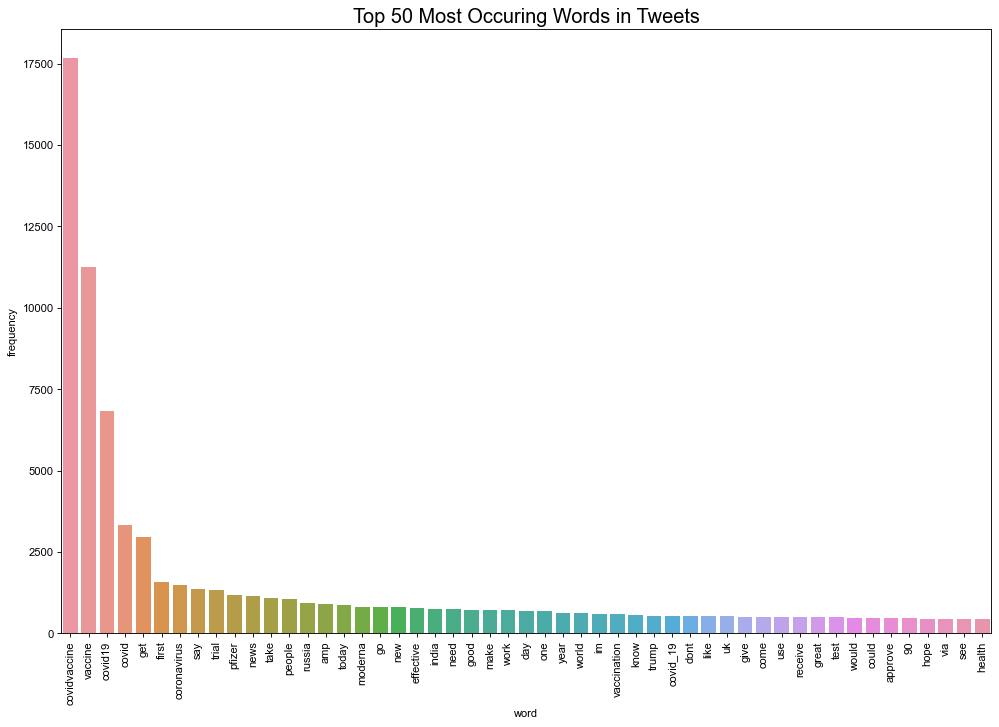

In [37]:
# Graph the words and their frequency

_ = figure( figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
_ = sns.barplot(x = count_df.iloc[0: 51, 0], y = count_df.frequency)
_ = plt.xticks(rotation= 90)
_ = sns.set(font_scale=1.5)
_ = plt.title('Top 50 Most Occuring Words in Tweets')

# 3) Build, Optimize and Evaluate Machine Learning Models

In [38]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

In [39]:
# Encode the sentiment of positive, neutral and negative into values

le = LabelEncoder()
df['Label_enc'] = le.fit_transform(df['sentiment'])
df.head()

,date,clean_txt,lemmatized,word_count,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_length,filtered_word_count,Label_enc
0,2020-08-18 12:55:00,"[australia, to, manufacture, covid19, vaccine, and, give, it, to, the, citizens, for, free, of, cost, afp, quotes, prime, minister, covidvaccine]",australia manufacture covid19 vaccine give citizen free cost afp quote prime minister covidvaccine,20,0.400,0.800,positive,0.000,0.784,0.216,0.5106,98,13,2
1,2020-08-18 12:55:00,"[coronavirusvaccine, coronavaccine, covidvaccine, australia, is, doing, very, good]",coronavirusvaccine coronavaccine covidvaccine australia good,8,0.700,0.600,positive,0.000,0.580,0.420,0.4404,60,5,2
2,2020-08-18 12:46:00,"[deaths, due, to, covid19, in, affected, countries, read, more, _piryani]",death due covid19 affected country read _piryani,10,-0.125,0.375,negative,0.524,0.476,0.000,-0.6705,48,7,0
3,2020-08-18 12:30:00,"[well, lets, qualify, that, would, anyone, of, any, party, get, a, vaccine, rushed, out, and, minimally, tested, coming, from, russia, covidvaccine]",well let qualify would anyone party get vaccine rush minimally test come russia covidvaccine,21,-0.100,0.600,positive,0.000,0.714,0.286,0.5859,92,14,2
4,2020-08-18 11:57:00,"[dna, zooms, up, charts, in, 1st, week, hear, vaccines, episode, pandemic, covid19, covidvaccine]",dna zoom chart 1st week hear vaccine episode pandemic covid19 covidvaccine,13,0.000,0.000,neutral,0.000,1.000,0.000,0.0000,74,11,1


In [40]:
# Select features for train and test

X = df['lemmatized']
y = df['Label_enc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=124, stratify=y)

# 3.1) Bernoulli Naive Bayes Model

In [41]:
# Transform text data into weighted numerical values
# Apply Bernoulli Naive Bayes variant
# Find best_accuracy based on baseline parameters

model_vect = TfidfVectorizer(min_df = 2)
tfidf_train = model_vect.fit_transform(X_train)
tfidf_test = model_vect.transform(X_test)
nb = BernoulliNB(alpha= 0.7)
nb.fit(tfidf_train, y_train)

best_accuracy = cross_val_score(nb, tfidf_test, y_test, cv= 5, scoring='accuracy').max()
print("Accuracy:",best_accuracy) # K-folds are not stratified, hence the accuracy is lower

Accuracy: 0.7425944841675178


In [42]:
# Set up GridSearch to hypertune parameters.

cv_method = StratifiedKFold(n_splits = 5) 
param_NB = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}  # Hyperparameter we want to tune
gs_NB = GridSearchCV(estimator=BernoulliNB(), 
                      param_grid= param_NB, 
                      cv= cv_method,
                      scoring='accuracy', 
                      return_train_score= True)

In [43]:
# Fit our gridsearch to our train set

gs_NB.fit(tfidf_train, y_train)
grid_df = pd.DataFrame(gs_NB.cv_results_)

In [44]:
# Predict values from test set

y_pred = gs_NB.predict(tfidf_test)
y_test_array = np.asarray(y_test)

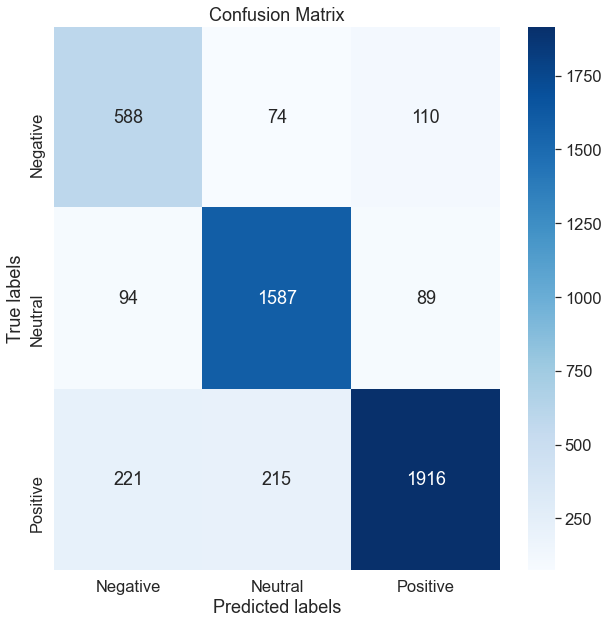

In [45]:
#Create heatmap of confusion matrix with regards to sentiment

cf_matrix = confusion_matrix(y_pred, y_test_array)
fig, ax= plt.subplots(figsize= (10,10))
sns.heatmap(cf_matrix, annot=True, ax = ax, cmap='Blues',fmt='');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive']);

In [46]:
# Precision and recall

print(classification_report(y_pred, y_test_array))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       772
           1       0.85      0.90      0.87      1770
           2       0.91      0.81      0.86      2352

    accuracy                           0.84      4894
   macro avg       0.80      0.82      0.81      4894
weighted avg       0.84      0.84      0.84      4894



In [47]:
# Show the different iteration of alpha and its mean score

grid_df[['param_alpha', 'mean_test_score']]

,param_alpha,mean_test_score
0,0.1,0.801318
1,0.2,0.809135
2,0.3,0.813937
3,0.4,0.816134
4,0.5,0.817666
5,0.6,0.818484
6,0.7,0.819046
7,0.8,0.818433
8,0.9,0.817462
9,1,0.816032


In [48]:
# How well our model fitted to the data?

gs_NB.score(tfidf_train, y_train)

0.9114130990088893

{'alpha': 0.7} 0.8190458719428113


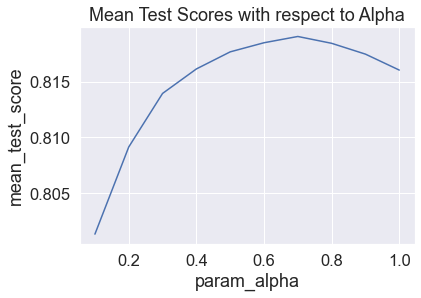

In [49]:
# Plot results. It appears an alpha of 0.7 will provide the most accurate results
print(gs_NB.best_params_, gs_NB.best_score_)
_ = plt.title('Mean Test Scores with respect to Alpha')
_ = sns.lineplot(x = grid_df['param_alpha'], y = grid_df['mean_test_score'], markers= True )

# 3.2) RandomForest Classifier

In [50]:
# Lets try using RandomForestClassifier and see if the results are better

rfc = RandomForestClassifier(n_estimators = 90)
rfc.fit(tfidf_train, y_train)
best_accuracy_rfc = cross_val_score(rfc, tfidf_test, y_test, cv= 5, scoring='accuracy').max()
print("Accuracy:",best_accuracy_rfc) # Accuracy is less when not using stratified K-folds

Accuracy: 0.7497446373850868


In [83]:
# Lets tune our hyperparameters like we did previously
# Hyperparameters we want to tune

param_RFC = {'n_estimators': [10, 20,30, 40, 50, 100, 150, 200, 250, 300, 350, 400]} # Found better results w/o gridsearching max_depth
gs_RFC = GridSearchCV(estimator= RandomForestClassifier(), 
                      param_grid= param_RFC, 
                      cv= cv_method,
                      scoring='accuracy')

In [84]:
gs_RFC.fit(tfidf_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                         

In [85]:
grid_rfc = pd.DataFrame(gs_RFC.cv_results_)

{'n_estimators': 350} 0.8256874004376339


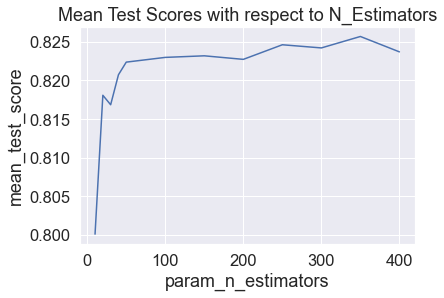

In [86]:
# As shown below the best parameter is 350 with a mean test accuracy score of 82.6%.
# Better than our Bernoulli NB model by approximately 0.7%

print(gs_RFC.best_params_, gs_RFC.best_score_)
_ = plt.title('Mean Test Scores with respect to N_Estimators')
_ = sns.lineplot(x = grid_rfc['param_n_estimators'], y = grid_rfc['mean_test_score'], markers= True )

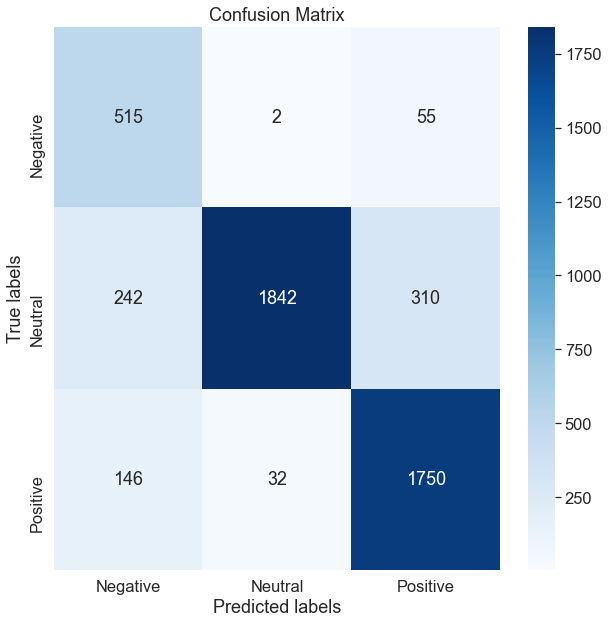

In [87]:
#Create heatmap of confusion matrix with regards to sentiment

y_pred_RFC = gs_RFC.predict(tfidf_test)

cf_matrix_RFC = confusion_matrix(y_pred_RFC, y_test_array)
fig, ax= plt.subplots(figsize= (10,10))
sns.heatmap(cf_matrix_RFC, annot=True, ax = ax, cmap='Blues',fmt='');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative', 'Neutral', 'Positive']); ax.yaxis.set_ticklabels(['Negative', 'Neutral', 'Positive']);

In [88]:
print(classification_report(y_pred_RFC, y_test_array)) 

              precision    recall  f1-score   support

           0       0.57      0.90      0.70       572
           1       0.98      0.77      0.86      2394
           2       0.83      0.91      0.87      1928

    accuracy                           0.84      4894
   macro avg       0.79      0.86      0.81      4894
weighted avg       0.87      0.84      0.84      4894

